<img src="https://s3.amazonaws.com/datascienceheroes.com/EDV/360_banner_python.png" width="400px">


# Escuela de Datos Vivos 

## LAB P.I.4.1: Comenzando con el análisis exploratorio de datos
Creado por Pablo Casas | https://escueladedatosvivos.ai   

## Ejercicios

1) Cargar los datos de 'diabetes':

2) Hacer un análisis de frecuencia de la variable a predecir (diabetic_type). ¿Están todas las clases igualmente distribuidas?

3) Realizar un análisis univariado de las variables numéricas con las funciones `profiling_num` y `describe` de pandas (¿se animan a trasponer la tabla para que los nombres queden arriba y no al costado? 

4) ¿Cuáles son las variables que mas dispersión tienen? Analizarlo grafica y analiticamente.

---

## Solución

In [31]:
# Cargamos las librerías que utilizaremos en este proyecto

import pandas as pd
from funpymodeling.exploratory import status, freq_tbl, profiling_num
import matplotlib.pyplot as plt
import seaborn as sns 

1) Cargamos los datos

In [14]:
data=pd.read_csv("../data/diabetes_multi.csv", sep = ";")
print(f"Cantidad de registros: {data.shape[0]}")
print(f"Cantidad de atributos: {data.shape[1]}")

Cantidad de registros: 2442
Cantidad de atributos: 8


In [10]:
# Imprimimos 5 registros al azar para una primera inspección de los datos
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,diabetic_type
1284,1,118,58,36,94,0.261,23,pre-diabetic
2346,1,95,74,21,73,0.673,36,normal
1102,8,197,74,0,0,1.191,39,diabetic
1121,14,175,62,30,0,0.212,38,diabetic
981,0,162,76,56,100,0.759,25,diabetic


Vemos que hay 6 variables numéricas: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction, y 2 variables categóricas: Age, diabetic_type. Aunque 'Age' es categórica, es expresada numéricamente.

In [11]:
# Miramos la cantidad de ceros y valores nulos por cada atributo. También los valores únicos, que dificultan el aprendizaje
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pregnancies,0,0.0,376,0.153972,17,int64
1,Glucose,0,0.0,4,0.001638,134,int64
2,BloodPressure,0,0.0,104,0.042588,47,int64
3,SkinThickness,0,0.0,765,0.313268,51,int64
4,Insulin,0,0.0,1193,0.488534,182,int64
5,DiabetesPedigreeFunction,0,0.0,0,0.000000,496,float64
6,Age,0,0.0,0,0.000000,52,int64
7,diabetic_type,0,0.0,0,0.000000,3,object


Vemos que no hay valores nulos en ninguno de los atributos. Hay valores cero en las variables numéricas, algunos de ellos no tienen sentido (por ejemplo glucosa cero, presión sanguínea cero).

2) Análisis de frecuencia de la variable a predecir diabetes_type

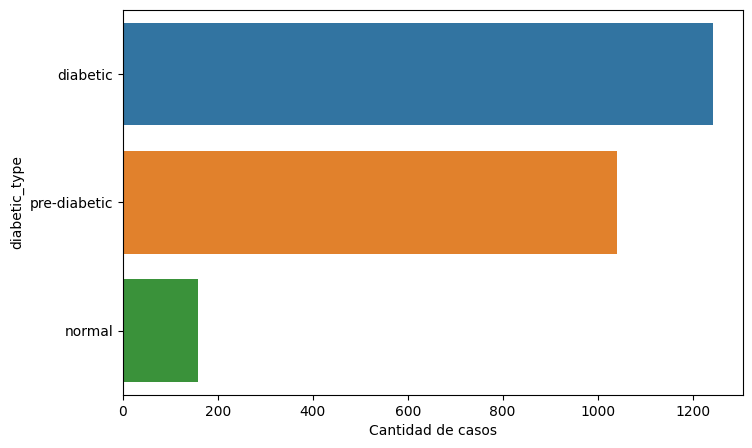

In [26]:
# Para la variable categórica de interés hacemos un histograma de frecuencia

plt.figure(figsize=(8,5))
sns.countplot(y=data['diabetic_type'], order = data['diabetic_type'].value_counts().index)
plt.xlabel('Cantidad de casos')
plt.show()

Podemos ver que no todas las clases están igualmente distribuidas, los casos predominantes corresponden a encuestados etiquedados como diabéticos o pre-diabéticos.

Hacemos un análisis cuantitativo con la función freq_tbl.

In [30]:
freq_tbl(data.diabetic_type).sort_values(by="cumulative_perc")

,diabetic_type,frequency,percentage,cumulative_perc
0,diabetic,1244,0.509419,0.509419
1,pre-diabetic,1040,0.425880,0.935299
2,normal,158,0.064701,1.000000


Vemos que menos del 7% de los registros corresponden a etiquetas "normal" para el atributo diabetic_type.

3) Análisis univariado de las variables numéricas

In [33]:
# Con la función describe() de pandas obtenemos cantidades estadísticas de las variables numéricas

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
count,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000
mean,4.012695,130.220721,70.282555,20.736282,90.502867,0.482371,34.315725
std,3.458219,28.056886,19.137154,16.528899,124.752193,0.342914,12.079750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,109.000000,64.000000,0.000000,0.000000,0.240000,24.000000
50%,3.000000,125.000000,72.000000,23.000000,42.500000,0.380500,30.000000
75%,6.000000,147.000000,80.000000,33.000000,146.000000,0.654000,42.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000


Podemos observar en particular que los valores del atributo Insulin tienen una desviación estándar muy grande comparado con su valor medio. Esto sugiere presencia de outliers.

In [35]:
# Las variables numéricas también pueden ser exploradas estadísticamente con el método profiling_num

profiling_num(data).T

,0,1,2,3,4,5,6
variable,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
mean,4.012695,130.220721,70.282555,20.736282,90.502867,0.482371,34.315725
std_dev,3.458219,28.056886,19.137154,16.528899,124.752193,0.342914,12.07975
variation_coef,0.86182,0.215456,0.272289,0.7971,1.378434,0.710893,0.352018
p_0.01,0.0,76.0,0.0,0.0,0.0,0.1,21.0
p_0.05,0.0,95.0,44.0,0.0,0.0,0.14,21.0
p_0.25,1.0,109.0,64.0,0.0,0.0,0.24,24.0
p_0.5,3.0,125.0,72.0,23.0,42.5,0.3805,30.0
p_0.75,6.0,147.0,80.0,33.0,146.0,0.654,42.0
p_0.95,10.0,184.0,92.0,45.0,325.0,1.154,59.0


Verificamos que el atributo Insulin presenta outliers, pues el percentil 0.99 corresponde al valor 543, pero el valor máximo es 846.

4) Analizamos la dispersión de los datos para cada variable numérica

<Figure size 640x480 with 0 Axes>

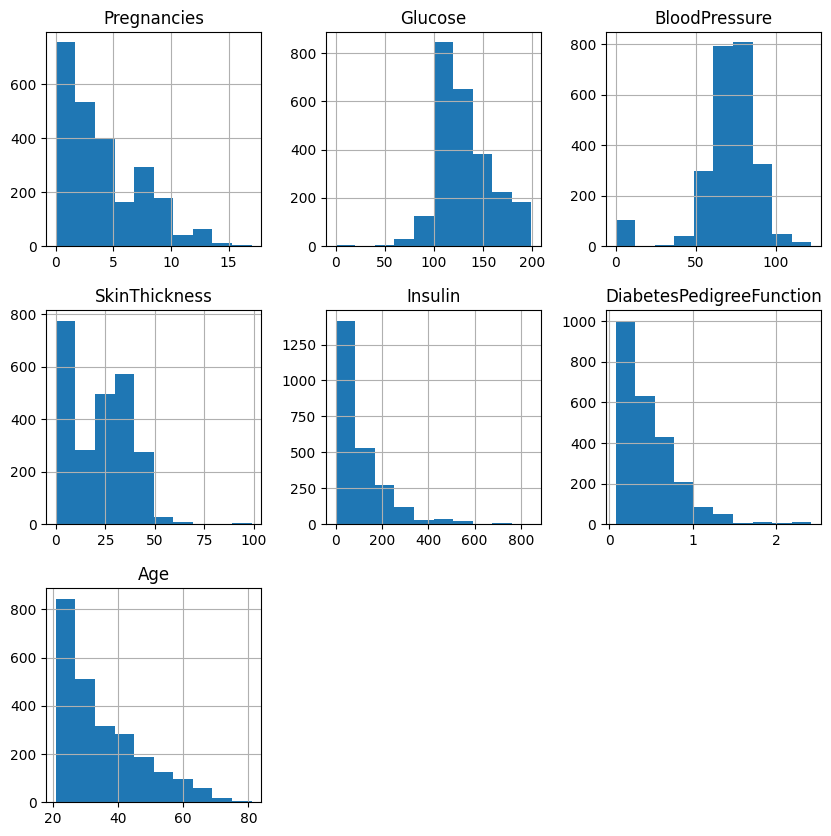

In [40]:
# Hacemos un histograma de las variables numéricas con el método hist() de pandas
# Variables numéricas: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedrigreeFunction, Age

plt.figure()
data.hist(figsize = (10,10))
plt.show()

Las variables que más dispersipon tienen son Pregnancies, Insuline, y SkinThickness. Esto es consistente con el coeficiente de variación obtenido con el método profiling_num. Es importante notar que existen valores imposibles como tener BloodPressure o Glucose igual a 0.